# Comparison of Optical Circuit Transformations

## Objective
Compare the execution time and accuracy of two transformation methods for decomposing unitary matrices in linear optical quantum circuits using the Clements scheme.

### Transformations Compared:
- **transfo_A**: `clements_decomposition` - The preliminary decomposition algorithm
- **transfo_B**: `full_clements` - The complete optimized decomposition with left inversion

We will analyze how performance scales with circuit size and compare the computational efficiency of both approaches.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from clements_scheme.clements_scheme import full_clements
from clements_scheme.rnd_unitary import random_unitary
import small_matrix as sm
import fock_amplitude as fa
# Configuration for benchmarking
circuit_sizes = [2, 3, 4, 5, 6, 7, 8]  # Vary the circuit sizes
num_trials_per_size = 10  # Number of trials for each size to get average execution time

# Initialize storage for results
results_transfo_A = {'sizes': [], 'times': [], 'errors': []}
results_transfo_B = {'sizes': [], 'times': [], 'errors': []}

def transformationA(U):
  return sm.contract_circuit(U)

def transformationB(U):
  return fa.fock_tensor_bs(U)

In [6]:
# Benchmarking loop
for size in circuit_sizes:
    times_A = []
    times_B = []
    
    for trial in range(num_trials_per_size):
        # Generate a random unitary matrix
        U = random_unitary(size)
        
        # Apply full_clements decomposition as input to transformations
        to_test = full_clements(U)
        
        # ===== Transformation A =====
        try:
            start_time = time.time()
            result_A = transformationA(to_test)
            elapsed_time_A = time.time() - start_time
            times_A.append(elapsed_time_A)
        except Exception as e:
            times_A.append(None)
        
        # ===== Transformation B =====
        try:
            start_time = time.time()
            result_B = transformationB(to_test)
            elapsed_time_B = time.time() - start_time
            times_B.append(elapsed_time_B)
        except Exception as e:
            times_B.append(None)
    
    # Calculate average times and standard deviations (filtering out None values)
    valid_times_A = [t for t in times_A if t is not None]
    valid_times_B = [t for t in times_B if t is not None]
    
    avg_time_A = np.mean(valid_times_A) if valid_times_A else None
    avg_time_B = np.mean(valid_times_B) if valid_times_B else None
    
    std_time_A = np.std(valid_times_A) if valid_times_A else None
    std_time_B = np.std(valid_times_B) if valid_times_B else None
    
    # Store results for later plotting and analysis
    results_transfo_A['sizes'].append(size)
    results_transfo_A['times'].append(avg_time_A)
    results_transfo_A['errors'].append(std_time_A)
    
    results_transfo_B['sizes'].append(size)
    results_transfo_B['times'].append(avg_time_B)
    results_transfo_B['errors'].append(std_time_B)

In [13]:
print(results_transfo_B['times'])

[None, None, None, None, None, None, None]


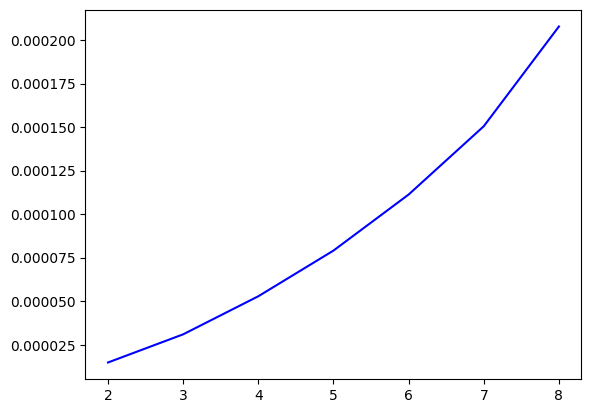

In [12]:
plt.plot(results_transfo_A['sizes'],results_transfo_A['times'], color='blue')

plt.plot(results_transfo_B['sizes'],results_transfo_B['times'], color='red')

plt.show()